# Walmart

## Problem Statement
To predict the weekly sales several walmart stores to help accurately estimate the demand

## Description:
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

## Acknowledgements
The dataset is taken from Kaggle.

## Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the sales w.r.t single & multiple features.
Also evaluate the models & compare their respective scores like R2, RMSE, etc.

### Terminology
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [29]:
data = pd.read_csv('Walmart.csv')
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [5]:
data.median()

Store               23.000000
Weekly_Sales    960746.040000
Holiday_Flag         0.000000
Temperature         62.670000
Fuel_Price           3.445000
CPI                182.616521
Unemployment         7.874000
dtype: float64

In [6]:
data.skew()

Store           0.000000
Weekly_Sales    0.668362
Holiday_Flag    3.373499
Temperature    -0.336768
Fuel_Price     -0.096158
CPI             0.063492
Unemployment    1.188144
dtype: float64

In [7]:
data.kurtosis()

Store          -1.201187
Weekly_Sales    0.053141
Holiday_Flag    9.383410
Temperature    -0.612801
Fuel_Price     -1.177378
CPI            -1.839813
Unemployment    2.639712
dtype: float64

In [8]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<Axes: xlabel='Holiday_Flag', ylabel='count'>

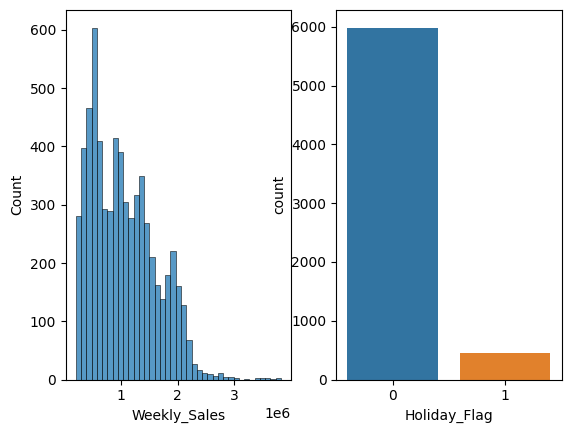

In [9]:
plt.subplot(1,2,1)
sns.histplot(x=data['Weekly_Sales'])
plt.subplot(1,2,2)
sns.countplot(x=data['Holiday_Flag'])

<Axes: ylabel='Density'>

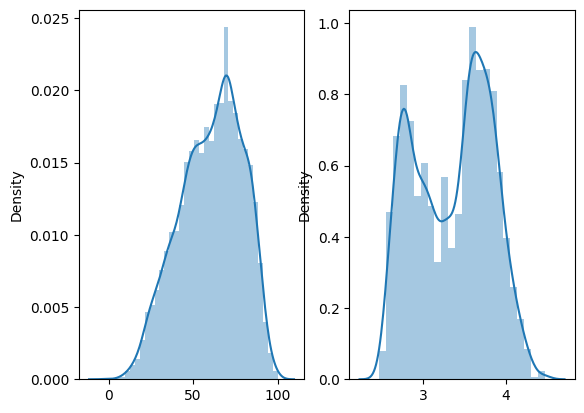

In [10]:

plt.subplot(1,2,1)
sns.distplot(x=data['Temperature'])
plt.subplot(1,2,2)
sns.distplot(x=data['Fuel_Price'])

<Axes: ylabel='Density'>

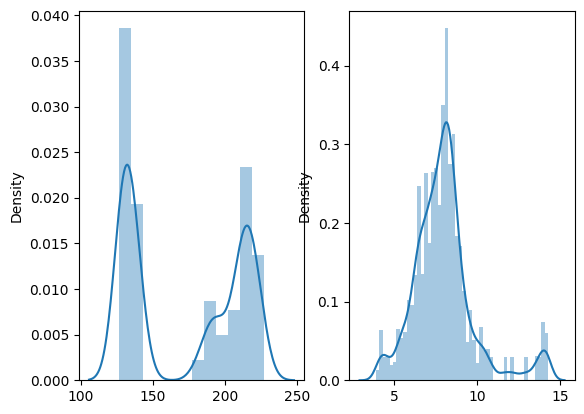

In [11]:
plt.subplot(1,2,1)
sns.distplot(x=data['CPI'])
plt.subplot(1,2,2)
sns.distplot(x=data['Unemployment'])

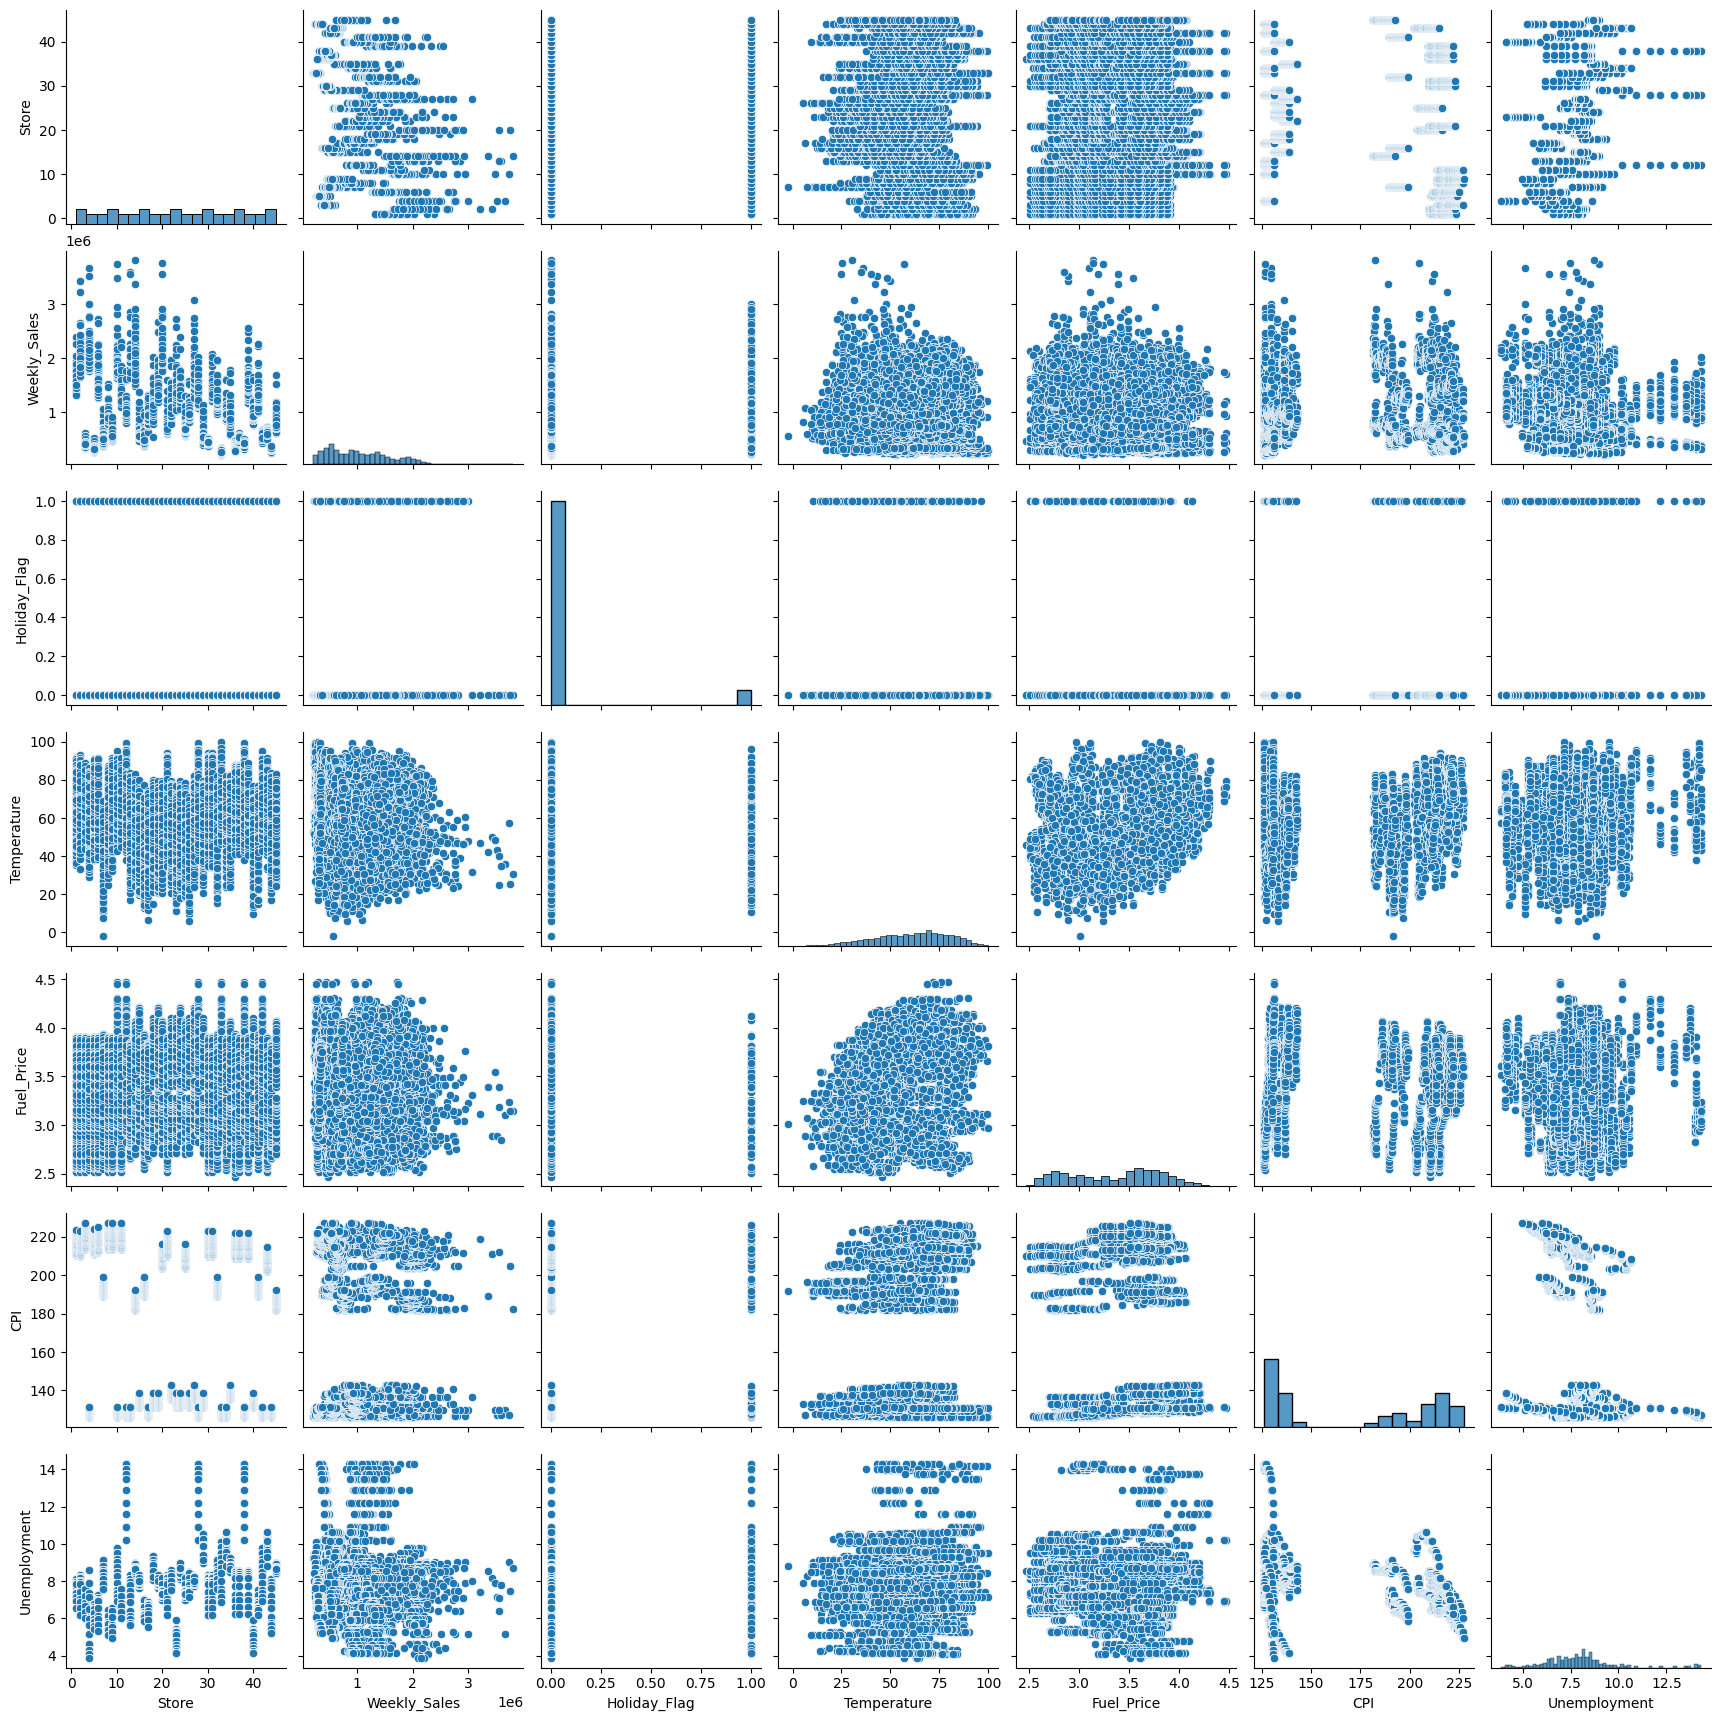

In [12]:
sns.pairplot(data)

<Axes: >

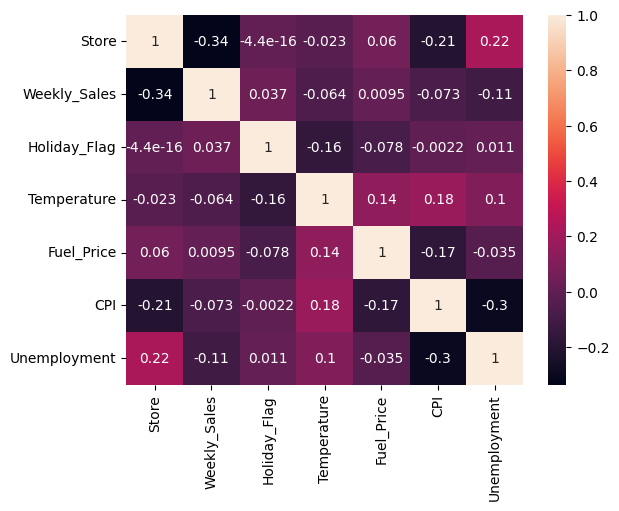

In [13]:
sns.heatmap(data.corr() ,annot=True)

<Axes: xlabel='Unemployment'>

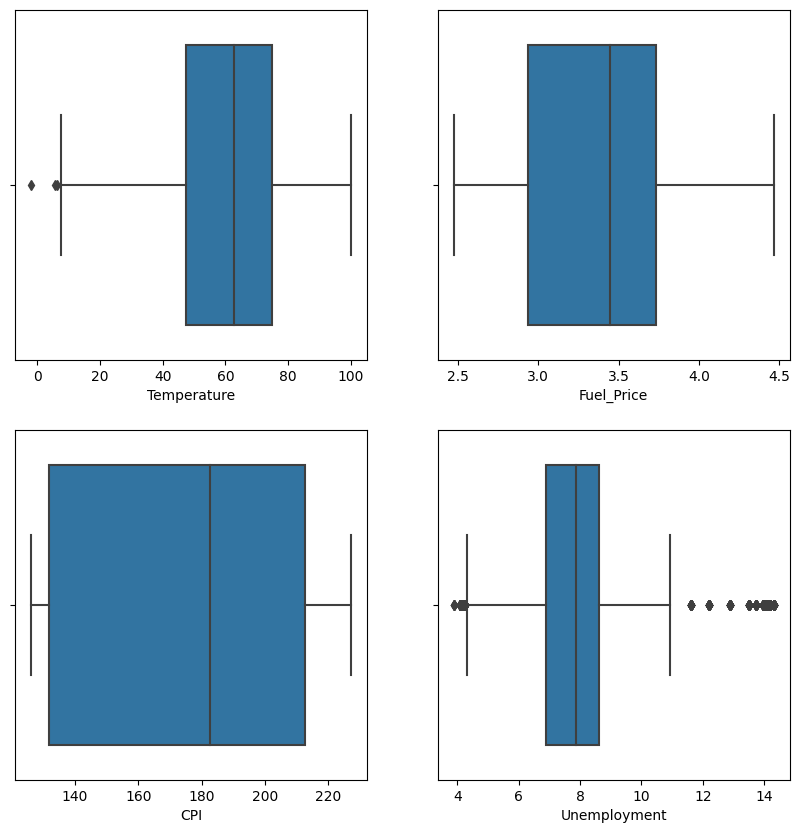

In [14]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(x=data['Temperature'])
plt.subplot(2,2,2)
sns.boxplot(x=data['Fuel_Price'])
plt.subplot(2,2,3)
sns.boxplot(x=data['CPI'])
plt.subplot(2,2,4)
sns.boxplot(x=data['Unemployment'])


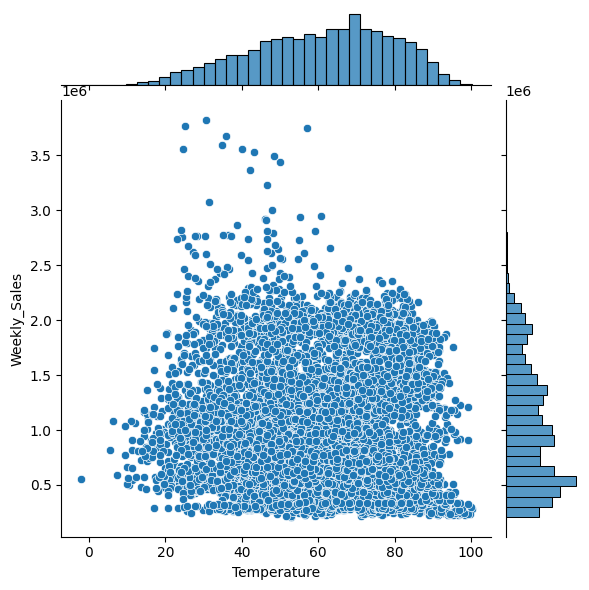

In [15]:
sns.jointplot(x=data['Temperature'] ,y=data['Weekly_Sales'])

18.523600000000002


<Axes: xlabel='Temperature'>

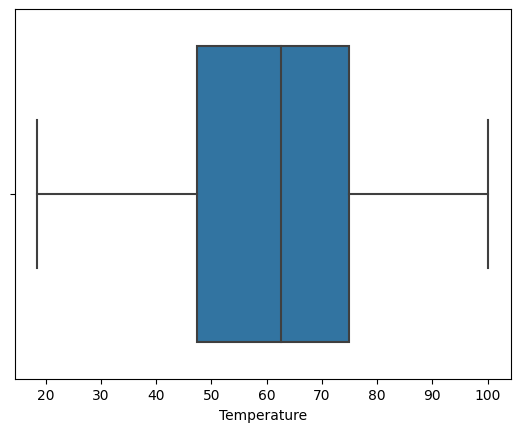

In [16]:
p5 = np.percentile(data.Temperature, 1)
print(p5)
p = np.where(data.Temperature<p5,p5, data.Temperature)
data.Temperature = p
sns.boxplot(x = data.Temperature)

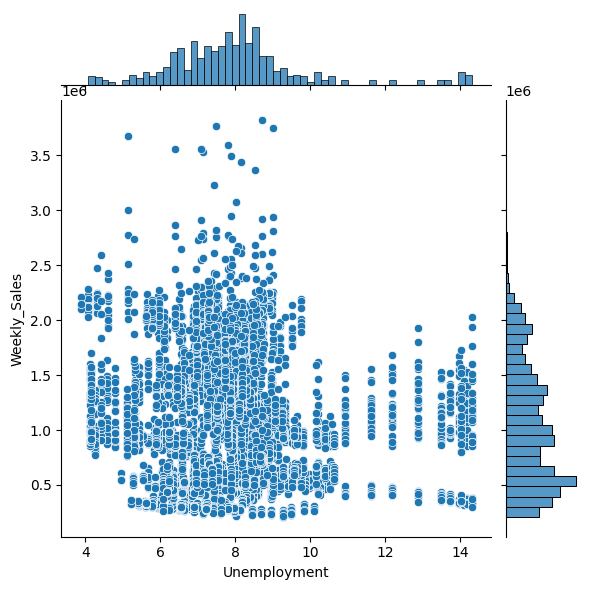

In [17]:
sns.jointplot(x=data['Unemployment'] ,y=data['Weekly_Sales'])

4.42 10.926


<Axes: xlabel='Unemployment'>

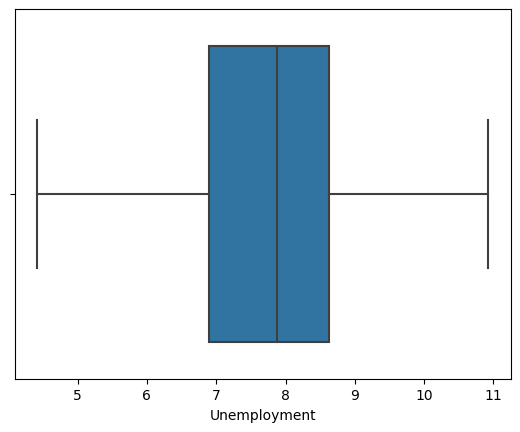

In [18]:
p5 = np.percentile(data.Unemployment, 2)
p90 = np.percentile(data.Unemployment, 94)
print(p5, p90)
p = np.where(data.Unemployment<p5, p5, data.Unemployment)
p= np.where(p>p90, p90, p)

data.Unemployment = p
sns.boxplot(x = data.Unemployment)

In [19]:
data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [20]:
x = data.drop(columns=['Weekly_Sales', 'Date'], axis=1)
y = data.Weekly_Sales

## Scaling the dataset 

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
a = scaler.transform(x)
x = pd.DataFrame(a, columns = x.columns)
x.head()

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment
0    0.0           0.0     0.291441    0.050100  0.840500      0.566554
1    0.0           1.0     0.244882    0.038076  0.841941      0.566554
2    0.0           0.0     0.262281    0.021042  0.842405      0.566554
3    0.0           0.0     0.344372    0.044589  0.842707      0.566554
4    0.0           0.0     0.342779    0.076653  0.843008      0.566554

## Splitting the dataset 

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)

## Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
# Create a Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the regularization parameter alpha

# Fit the model on the training data
lasso.fit(xtrain, ytrain)

# Predict on the test data
ypred = lasso.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score =", r2_score(ytest, ypred))
print("MSE =",mean_squared_error(ytest, ypred))
print("RMSE =", (mean_squared_error(ytest, ypred))**0.5)
print("MAE =",mean_absolute_error(ytest, ypred))

R2 score = 0.15731293626158727
MSE = 270625724561.7728
RMSE = 520216.9975709875
MAE = 426198.8308701095


## Ridge regression 

In [24]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge = Ridge(alpha=0.1)  # Set the regularization parameter alpha

# Fit the model on the training data
ridge.fit(xtrain, ytrain)

# Predict on the test data
ypred = ridge.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score =", r2_score(ytest, ypred))
print("MSE =",mean_squared_error(ytest, ypred))
print("RMSE =", (mean_squared_error(ytest, ypred))**0.5)
print("MAE =",mean_absolute_error(ytest, ypred))

R2 score = 0.15730763657348756
MSE = 270627426536.31787
RMSE = 520218.63339976384
MAE = 426201.56849984237


## Decision Tree regression

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor object
tree_reg = DecisionTreeRegressor()

# Fit the model to the training data
tree_reg.fit(xtrain, ytrain)

# Predict on the test data
ypred = tree_reg.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score =", r2_score(ytest, ypred))
print("MSE =",mean_squared_error(ytest, ypred))
print("RMSE =", (mean_squared_error(ytest, ypred))**0.5)
print("MAE =",mean_absolute_error(ytest, ypred))

R2 score = 0.8983535197050893
MSE = 32643378025.681038
RMSE = 180674.78525151493
MAE = 92099.16580484773


## RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
rand_forest = RandomForestRegressor(n_estimators=100, random_state=0)
 
# fit the regressor with x and y data
rand_forest.fit(xtrain, ytrain)
ypred = rand_forest.predict(xtest)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 score =", r2_score(ytest, ypred))
print("MSE =",mean_squared_error(ytest, ypred))
print("RMSE =", (mean_squared_error(ytest, ypred))**0.5)
print("MAE =",mean_absolute_error(ytest, ypred))

R2 score = 0.9340478577551995
MSE = 21180278005.241497
RMSE = 145534.45641923253
MAE = 75987.74288353013


In [27]:
import pickle
pickle.dump(rand_forest,open("model.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl", "wb"))